In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Getting list of columns from measurement table
inspector=inspect(engine)
columns=inspector.get_columns('measurement')

for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [11]:
#Getting the recent date from the tuple and converting it into datetime
recent_date_dt=dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
recent_date_date=recent_date_dt.date()
recent_date_date

datetime.date(2017, 8, 23)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_one_year_ago=recent_date_date-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=date_one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df=pd.DataFrame(data, columns=["date", "precipitation"])

# Sort the dataframe by date in descending order
measurement_df=measurement_df.sort_values("date")


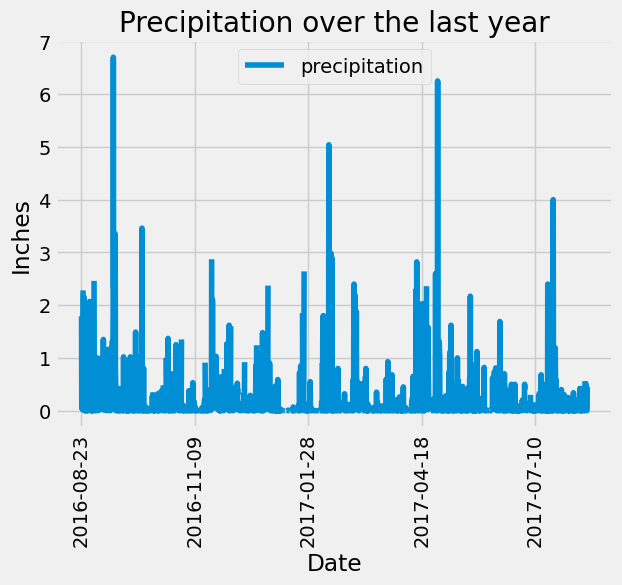

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df=measurement_df.set_index("date")
measurement_df.plot()
plt.title("Precipitation over the last year")
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.xlabel("Date")

plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                                                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_id=active_stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                           filter(Measurement.station==active_id).all()

[(54.0, 85.0, 71.66378066378067)]

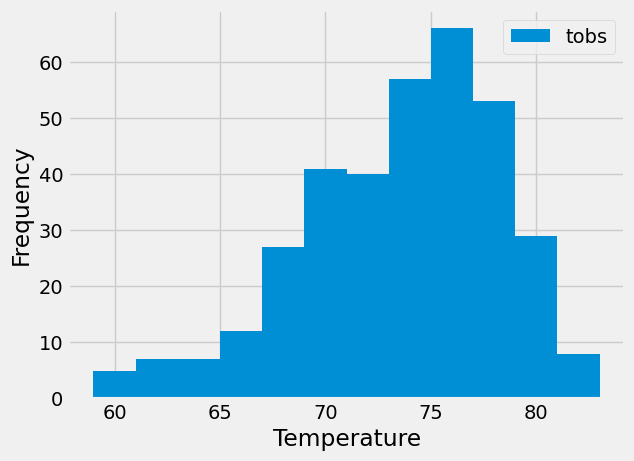

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data=session.query(Measurement.tobs).filter(Measurement.station==active_id).filter(Measurement.date>=date_one_year_ago).all()

temp_df=pd.DataFrame(temp_data, columns=["tobs"])

temp_df.plot(kind="hist", legend=True, bins=12)

plt.xlabel("Temperature")

plt.show()

# Close Session

In [19]:
# Close Session
session.close()